# 파이썬으로 이미지 파일 다루기

이번 LMS에서는 색상 히스토그램을 기반으로 주어진 이미지들 중 비슷한 색상 분포를 가지고 있는 이미지를 찾아주는 기능을 구현해보자.

학습 목표

- 컴퓨터에서 이미지가 표현되는 방식을 이해한다.
- Pillow와 OpenCV로 Python에서 이미지 파일을 열고 정보를 추출할 수 있다.
- CIFAR-100에서 히스토그램을 기반으로 유사한 이미지를 골라낼 수 있다.


실습환경 구성
 - 패키지 설치 : Pillow, OpenCV, Matplotlib
    ```
    $ pip install pillow opencv-python matplotlib    
    ```

 - cifar-100-python 데이터셋 
    - https://www.cs.toronto.edu/~kriz/cifar.html


# 디지털 이미지

![이](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Tricolour_television_close_up.jpg/310px-Tricolour_television_close_up.jpg)

이미지는 색상을 자기는 점하나를 화소(픽셀)이라고 하며 각 픽셀은  RGB(Red, Green, Blue) 세 개의 단일 색의 강도를 각각 조절하여 색상을 표현한다.

디지털 이미지의 저장방식
- 이미지를 저장하는 방법 중 가장 단순한 방법은, 각 점 하나하나의 색상 값을 저장
- 래스터(raster) 또는 비트맵(bitmap) 방식 
 - 보통 한 점마다 각 색상별로 8비트를 사용하여 0~255 사이의 값(2^8 = 256)으로 해당 색의 감도를 표시
 - 사진 파일
- 벡터(vector) 방식 
 - 이미지는 상대적인 점과 선의 위치를 방정식으로써 기록해 두었다가, 확대 및 축소에 따라 디지털 화면의 각 화소에 어떻게 표현될지를 재계산
 - 글꼴, 일러스트

 ![이](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/VectorBitmapExample.svg/220px-VectorBitmapExample.svg.png)

# Pillow 
이미지 
- Numpy [row,column,channel] 차원의 배열로 표현됨
- 배열내 원소의 데이터 타입 : uint8( unsigned 8bit integer) 0~255승의 값을 가진다
- 0 : 검정색, 255 : 흰색

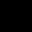

In [ ]:
import numpy as np
from PIL import Image

data = np.zeros([32,32,3], dtype=np.uint8) #0 으로 초기화될경우 검정이미지가 표시된다
image = Image.fromarray(data, 'RGB')
image

동일한 배열에 빨간색 이미지를 출력해보자

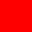

In [ ]:
data[:, :] = [255,0,0]
image = Image.fromarray(data, 'RGB')
image

이번에는 가로 세로 각 128 픽셀짜리 흰색 이미지를 만들어 화면에 표시해보자

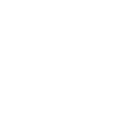

In [ ]:
data2 = np.zeros([128, 128, 3], dtype=np.uint8)
data2[:, :] = [255,255,255]
image = Image.fromarray(data2, 'RGB')
image

이미지 파일을 열어서 저장하는 작업도 해보자


Pillow에서 저장을 지원하는 파일 형태 : [참고](https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html)


In [ ]:
# 이미지 열기
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Aiffel/01_Fundamental/fund16/coffee.jpg')

# width와 height 출력
print(image.size)

# width와 height 출력
print(img.width)
print(img.height)

# PNG 파일 형식으로 저장해보기
image.save('coffee.png')

(640, 426)


resize()를 이용하여 이미지 크기를 100X200으로 변경하여 저장
- resize된 함수 호출시 변경된 이미지가 리턴됨. 단 원본이미지는 변하지 않음
- resize 내부에 튜플형태로 사이즈를 설정해야함

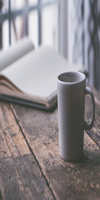

In [ ]:
image2 = image.resize((100,200))
image2.save('coffee2.jpg')
image2

crop()을 이용하여 이미지의 특정부분을 잘라낸후 저장

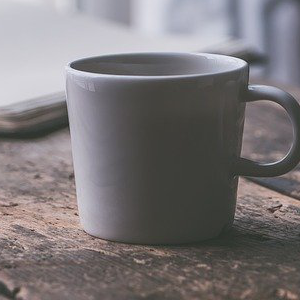

In [ ]:
box = (300, 100, 600, 400) #box의 시작점, 마지막점
image3 = image.crop( box  ) 
image3.save('coffee3.jpg')
image3

# Pillow를 활용한 전처리
이미지 데이터베이스 구축을 위해 CIFAR-100 데이터셋 을 활용해보려한다. 

CIFAR-100 데이터셋 
-  32x32 화소 해상도의 이미지들로 구성
- 100개 클래스 당 600장(각 학습용 500장, 테스트용 100장)하여 총 60,000장
- [파이썬 버전 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

압축을 해제하여 아래 코드를 실행해보자
실행 폴더에만 압축해제됨


- 압축 해제된 결과를 보면 이미지 파일들이 아니라 meta, test, train이라는 세 폴더만 나옴
- 본문 중 Dataset layout 아래 Python / Matlab versions 섹션 중 python3 버전에 따라 한번 파일을 열어보자

In [10]:
!tar -xvf '/content/drive/MyDrive/Colab Notebooks/Aiffel/01_Fundamental/fund16/cifar-100-python.tar.gz'


cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [12]:
import os
import pickle
from PIL import Image

dir_path = '/content/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train)) #<class 'dict'>

<class 'dict'>


In [13]:
train.keys() #dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

특이하게도 각키들이 문자열(str)이 아닌 b로 시작하는 bytes로 되어있다

앞의 5개만 출력해 보자

In [14]:
train[b'filenames'][0:5] 

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

파일 이름이 깔끔하게 나왔다. 그러면 이 파일 이름에 해당하는 이미지는 어디 있을까

In [15]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [17]:
train[b'data'][0].shape

(3072,)

- 3072라는 숫자는 빨강 초록 파랑 3채널 X 1024(=32 * 32)씩 각 화소에 해당한다.
- 이 Numpy 배열을 잘 reshape하면 이미지 파일 원본이 복구된다는 뜻입니다. 그럼 (32, 32, 3)으로 reshape한 후 이미지를 화면에 출력해 보자

- 3072바이트의 이미지 데이터의 구성
 - 앞 1024바이트는 빨강(R), 그다음 1024는 녹색(G), 마지막 1024는 파랑(B) 순으로 구성
 - 앞선 차원부터 데이터를 채워주기위해 np.reshape의 order=F로 설정하면 RGB순으로 1024를 32X32에 채우는 것을 3번 반복하는 방식의 reshape된다

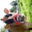

In [18]:
image_data = train[b'data'][0].reshape([32,32,3], order='F') # 첫번째 이미지 데이터를 reshape
image = Image.fromarray(image_data)
image

첫이미지가 출력해보았는데, 이미지의 X축과 Y축이 뒤집어져 있다. 축을 바꿔주는 작업을 해주자

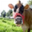

In [19]:
image_data = image_data.swapaxes(0,1)
image = Image.fromarray(image_data)
image

CIFAR-100의 데이터셋 원본을 분석해서 이미지 파일을 뽑아내는 것까지 진행해 보았다. 데이터셋에 고이 잠들어있는 바이트정보를 실제 파일처럼 가져오는 작업을 해보자

tqdm 라이브러리를 사용하면 진행상황을 체크하여볼수있다. (50000장이므로 시간이 2~3분가량 소요 예상)

In [20]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm


dir_path = '/content/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
image_dir_path =  '/content/cifar-images'
if not os.path.exists(image_dir_path):
    os.mkdir(image_dir_path) # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다.     
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        image_data = train[b'data'][i].reshape([32,32,3], order='F') # 첫번째 이미지 데이터를 reshape
        image_data = image_data.swapaxes(0,1)
        image = Image.fromarray(image_data)
        image.save(os.path.join(image_dir_path, filename))

100%|██████████| 50000/50000 [00:15<00:00, 3213.44it/s]


# 비슷한 이미지 찾아내기

In [31]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
train_file_path = os.path.join('/content/cifar-100-python', 'train')
images_dir_path = os.path.join('/content/', 'cifar-images')

In [32]:
# cifar 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    
    #open image
    img = Image.open(image_path) #왜 따로 여는가?
    cv_img = cv2.imread(image_path)
    
    #draw histogram
    f = plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title('Image')
    
    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i, col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_img], [i], None, [256], [0,256])
        im2.plot(histr, color=col)#  그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title('Histogram')
        
    

### calcHist 
파라미터
- [cv_img] : 입력이미지 배열
- 히스토그램을 얻을 채널 인덱스 0:blue, 1:green, 2:red)
- 세번째는 Mask 이미지
- 네번째는 X 축 요소(BIN)의 개수
- 다섯번째는 Y 축 요소값의 범위, 하나의 채널에 대한 화소 강도 0~255 

리턴값 :  256개의 요소를 갖는 배열

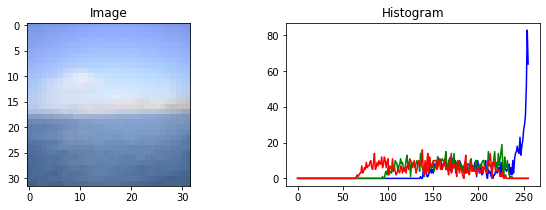

In [33]:
draw_color_histogram_from_image('adriatic_s_001807.png')

히스토그램을 그려보니 이미지에 전반적으로 보이는 파란색값에 대해 히스토그램에서 나타나는것 확인할수있다

---

# Open CV

OpenCV([튜토리얼](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html))는 오픈소스로 제공되는 컴퓨터 비전용 라이브러리
 - 영상 처리에 대한 다양한 고급 기능들이 사용하기 쉽도록 구현되어 있다.
 - 이미지에서 특정 색을 가진 영역만 추출하는 예제 만들어보자 : [참고](https://docs.opencv.org/4.x/df/d9d/tutorial_py_colorspaces.html)
  - 이미지를 읽기
  - 파란색을 찾기 쉽도록 컬러스페이스를 BGR(RGB)에서 HSV로 변환(OpenCV에서는 RGB가 아닌 BGR 순서를 사용하므로 주의)
  - 해당 색상과 맞는 영역만 표시하기

![이미지](https://docs.opencv.org/4.x/frame.jpg)

## 색상 추출 전체 코드

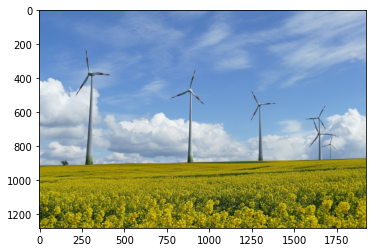

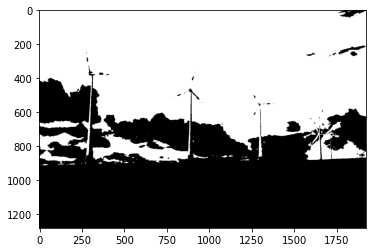

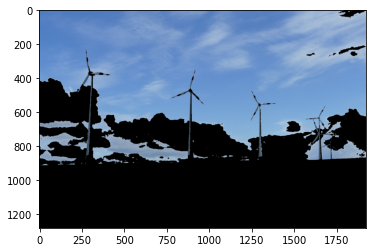

In [2]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/01_Fundamental/fund16/cv_practice.png'
img = cv.imread(img_path)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
#HSV 색 공간에서 색상(Hue) 값 110~130 사이, 
# 채도(Saturation) 및 명도(Value) 값 50~255 사이의 색들을 파란색이라고 정의
#lower_blue = np.array([100,50,50])
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv,  lower_blue, upper_blue)#마스크배열을 반환



# Bitwise-AND mask and original image 
#img : 픽셀당 hsv세채널값을 가지므로 400*300*3의 배열이고, 
# mask는 1또는 0만(파란색부분여부) 가지는 400*300*1의 배열이라고 할수 있다.
res = cv.bitwise_and(img, img, mask=mask)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()  #화면 표시용 함수 - cv.imshow(res) PIL.Image.show(), plt.imshow()



### bitwise 연산
- 두 장을 받아서 AND 비트 연산처리 [참고](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)
- 마스크를 넣어주면 해당 영역만 나오게됨

# Open CV 예제 분석
위의 예제를 한줄씩 분석해보자 - 주석참고

OpenCV 설치
- pip으로 설치 시 opencv-python이라는 이름으로 설치

